## Davis Dataset Description 

These dataset collected in the 1930s. It represents the observed attendance at 14 social events by 18 Southern women. The dataset consists of 18 women and 14 social events in a matrix indicates ‘1’ if a woman attends and ‘0’ if doesn’t. 


## Assignment 

Through this assignment we will respond to the question of, "What can you infer about the relationships between (1) the women, and (2) the social events?"


Tasks:

- Get data into python environment.
- Create a bipartite graph.
- Find the number attended events and friends for every woman.
- Find the number of attendees for every event.
- Plot the network. 
- Find network community using visual.
- Find the network degree, betweeness, and closeness centrality of the network.
- Analyze both node variables using projection to analyze the effect of communication and participation of women and the effect of having large events that provide better connectivity.
- Find the relationship and the most dominant variable of the network.


## Import Libraries 

Import libraries to perform visual and social network analysis to answer the assignment question. 

In [1104]:
import networkx as nx
import matplotlib.pyplot as plot
import pandas as pd
import collections  
import networkx.algorithms.bipartite as bipartite
from prettytable import PrettyTable
import numpy as np
import itertools
import community
import operator
from scipy.cluster import hierarchy
from scipy.spatial import distance
from __future__ import print_function
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

## Import Data

Import the Davis dataset form the network library datasets And make sure the data is bipartite and there is no connection between identical nodes type. 

In [1105]:
G = nx.davis_southern_women_graph()
bipartite.is_bipartite(G)

True

## Extract Nodes Sets 

Extract the nodes sets of the social network.

In [1106]:
womenNodes, eventsNodes = bipartite.sets(G)

print( "\nWomen:\n" + str(list(womenNodes)))
print( "\nEvents:\n" + str(list(eventsNodes)))


Women:
['Flora Price', 'Brenda Rogers', 'Ruth DeSand', 'Laura Mandeville', 'Theresa Anderson', 'Charlotte McDowd', 'Olivia Carleton', 'Sylvia Avondale', 'Nora Fayette', 'Eleanor Nye', 'Evelyn Jefferson', 'Dorothy Murchison', 'Katherina Rogers', 'Verne Sanderson', 'Helen Lloyd', 'Pearl Oglethorpe', 'Myra Liddel', 'Frances Anderson']

Events:
['E5', 'E6', 'E13', 'E10', 'E12', 'E11', 'E14', 'E9', 'E3', 'E8', 'E2', 'E4', 'E1', 'E7']


## Graph Data

Obtain the degree of freedom of all nodes to Provide an accurate visual of the dataset based on the number events every woman attended and the number of women every event attracted.

In [1107]:
womenDeg = dict(nx.degree(G, womenNodes))
eventsDeg = dict(nx.degree(G, eventsNodes))
nodesDegree=dict(nx.degree(G))

eventsDegDF = pd.DataFrame(list(eventsDeg.items()))
womenDegDF = pd.DataFrame(list(womenDeg.items()))

eventsDegDF.columns = ['Event','Degree']
eventsDegDF=eventsDegDF.sort_values(by='Degree', ascending = False)
eventsDegDF.reset_index(drop=True, inplace=True)

womenDegDF.columns = ['Woman','Degree']
womenDegDF=womenDegDF.sort_values(by='Degree', ascending = False)
womenDegDF.reset_index(drop=True, inplace=True)

dfDgree= pd.DataFrame(list(womenNodes) + list(eventsNodes), columns=['Nodes'])
dfDgree['Degrees'] = list(womenDegDF['Degree']) + list(eventsDegDF['Degree'])
nodeTypes = np.repeat("womenNodes",18).tolist() + np.repeat("eventsNodes",14).tolist()
dfDgree['Type'] = list(nodeTypes)


print("all nodes and their degree\n\n",dfDgree)

all nodes and their degree

                 Nodes  Degrees         Type
0         Flora Price        8   womenNodes
1       Brenda Rogers        8   womenNodes
2         Ruth DeSand        8   womenNodes
3    Laura Mandeville        7   womenNodes
4    Theresa Anderson        7   womenNodes
5    Charlotte McDowd        7   womenNodes
6     Olivia Carleton        6   womenNodes
7     Sylvia Avondale        5   womenNodes
8        Nora Fayette        4   womenNodes
9         Eleanor Nye        4   womenNodes
10   Evelyn Jefferson        4   womenNodes
11  Dorothy Murchison        4   womenNodes
12   Katherina Rogers        4   womenNodes
13    Verne Sanderson        4   womenNodes
14        Helen Lloyd        3   womenNodes
15   Pearl Oglethorpe        2   womenNodes
16        Myra Liddel        2   womenNodes
17   Frances Anderson        2   womenNodes
18                 E5       14  eventsNodes
19                 E6       12  eventsNodes
20                E13       10  eventsNodes
21 

The above table shows how many events every women has attended. 

Create a strings Label combining nodes and their degree values. 

In [1108]:
label={k: v for d in (womenDeg, eventsDeg) for k, v in d.items()}
label1=list(label.keys())
for i in range(len(label)):
    label[label1[i]]=str(label1[i]) +" : "+ str(label[label1[i]])

Draw the basic graph to have a visual of the social network to perform meaningful visual analysis based on nodes degree, which indicates the number of adjacent edges every women node has in the women set with nodes in the events sets and versed versa. 

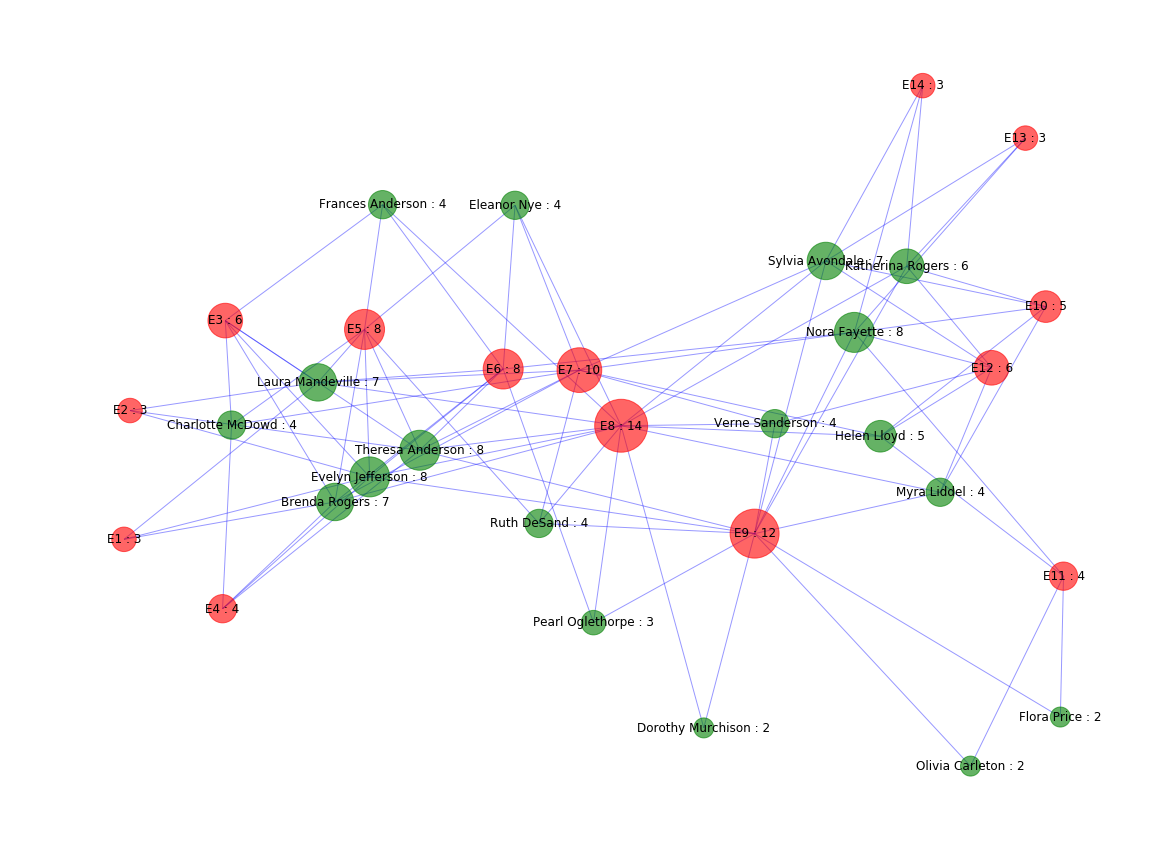

In [1109]:
pos=nx.spring_layout(G) 
valw=list(womenDeg.values())
valw=[v * 200 for v in valw]
vale=list(eventsDeg.values())
vale=[v * 200 for v in vale]

nx.draw_networkx_nodes(G,pos,node_size=valw,
                       node_color='g',
                       alpha=.6,
                       nodelist=womenDeg.keys())

nx.draw_networkx_nodes(G,pos,node_size=vale,
                       node_color='r',
                       alpha=.6,
                       nodelist=eventsDeg.keys())

# edges
nx.draw_networkx_edges(G,pos,edge_color='b',width=1.0,alpha=.4)
nx.draw_networkx_labels(G,pos,label)
fig = plot.gcf()
fig.set_size_inches(20,15)
plot.axis('off')
plot.show()

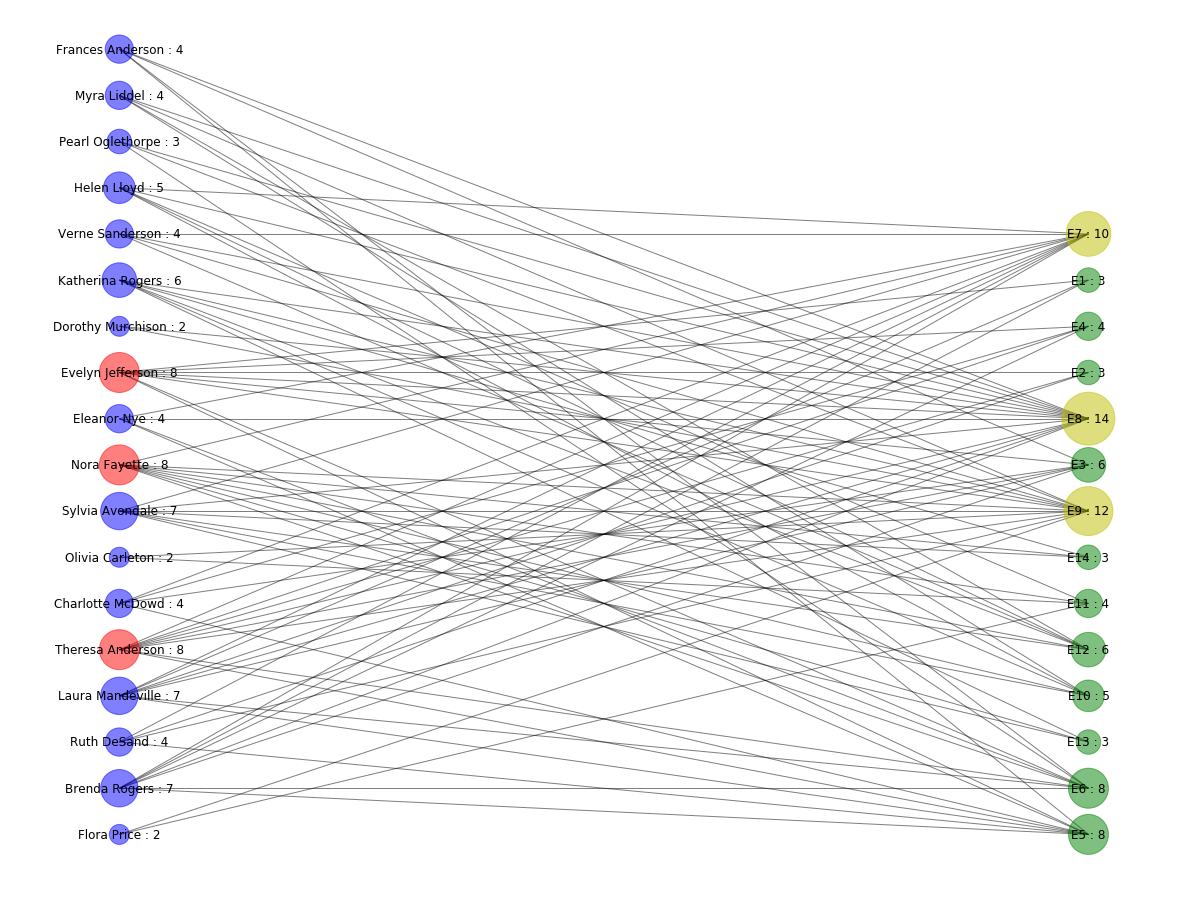

In [1110]:
colors=[]
deg= dict(nx.degree(G))
valf=list(deg.values())
valf=[v * 200 for v in valf]
for n, d in G.nodes(data=True):
    if d['bipartite']==1:    # bipartite = 1 indicates the clubs
        if G.degree(n) > 9:
            colors.append('y')   
        else: 
            colors.append('g')
    else:                      # bipartite = 0 indicates the women                               
        if G.degree(n) > 7: 
            colors.append('r')
        else:
            colors.append('b')  

pos = dict()
pos.update((n, (0, i*10)) for i, n in enumerate(womenNodes))
pos.update((n, (0.5, i*10)) for i, n in enumerate(eventsNodes))

plot.figure(figsize = (16,12))
nx.draw(G, pos=pos, 
        with_labels=False,
        edge_color='black', 
        vmin=0.5, vmax=3.0, 
        node_color=colors,
        alpha=.5,
        font_size=18,
        node_size=valf
        ) 
nx.draw_networkx_labels(G,pos,label)

plot.axis('off')
plot.show()

The graph above shows women and events names with their degree for all nodes in the network. Based on the graph, the participation of women in the events varies between two to eight events per woman. The events attendees also vary between three to fourteen women per events. 

Let’s visualize at the network communities

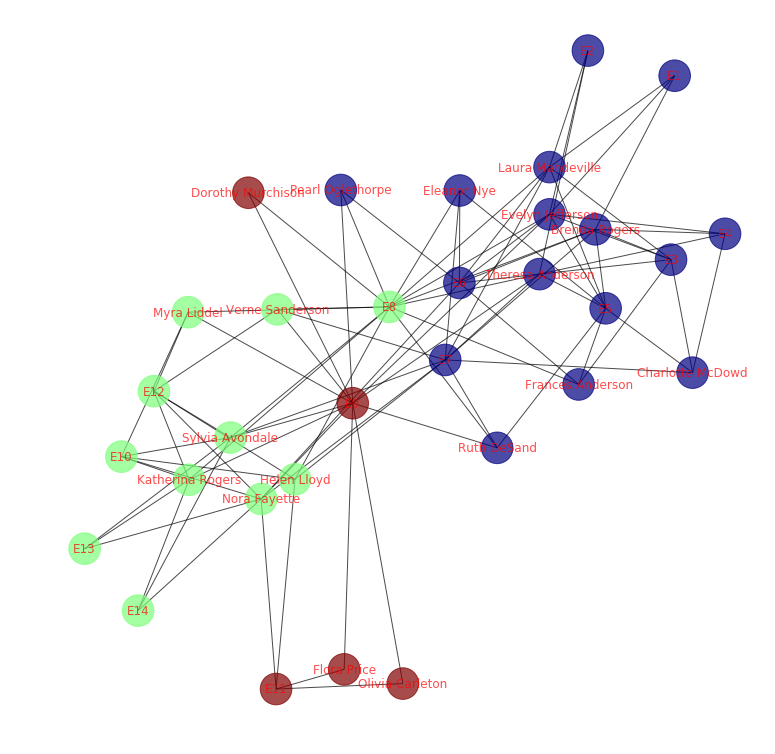

In [1111]:
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]
fig = plot.gcf()
fig.set_size_inches(10,10)
nx.draw_spring(G, cmap = plot.get_cmap('jet'), 
               font_size=12,
               node_color = values, 
               font_color='r',
               node_size=1000, 
               with_labels=True,
               alpha=.7)

The graph shows 3 communities the blue, green, and the brown colors. The blue is the largest follow by green and brown. The graph also shows the events 8 have many interconnections with the blue community and event 9 has many interconnections with green community. The graph reveals the small network binds between women and events.

Let’s find the centrality of the network to see if we could reveal some of the important figures and events that made up the relationship between network components in term of connectivity and interaction between communities 

In [1112]:
def drawGraph(G, pos, measures, measure_name,fscale,dscale):
    value=list(measures.values())
    valueColor=[x for x in value]
    value=[x*(10000*dscale) for x in value]
    fsize=int(8*fscale/4)
    nodes = nx.draw_networkx(G, pos,node_size=value, cmap=plot.cm.plasma, 
                                   node_color=valueColor,
                                   font_size=fsize,
                                   alpha=.7,
                                   edge_size=0.5,
                                   with_labels=True,
                                   nodelist=measures.keys())
    fig = plot.gcf()
    fig.set_size_inches(24,16)
    plot.title(measure_name)
    #plot.colorbar()
    plot.axis('off')
    #plot.show()

In [1113]:
def drawGraphColorBar(G, pos, measures, measure_name,fscale,dscale):
    value=list(measures.values())
    valueColor=[x for x in value]
    value=[x*(2500*dscale) for x in value]
    fsize=int(8*fscale/4)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=value, cmap=plot.cm.plasma, 
                                   node_color=valueColor,
                                   font_size=fsize,
                                   font_color='r',
                                   alpha=.7,
                                   nodelist=measures.keys())
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    labels = nx.draw_networkx_labels(G, pos,font_color='r')
    edges = nx.draw_networkx_edges(G, pos, with_labels=True,font_weight='bold',alpha=.7,edge_size=0.5)

    

    fig = plot.gcf()
    fig.set_size_inches(24,16)
    plot.title(measure_name)
    plot.colorbar(nodes)
    plot.axis('off')
    #plot.show()

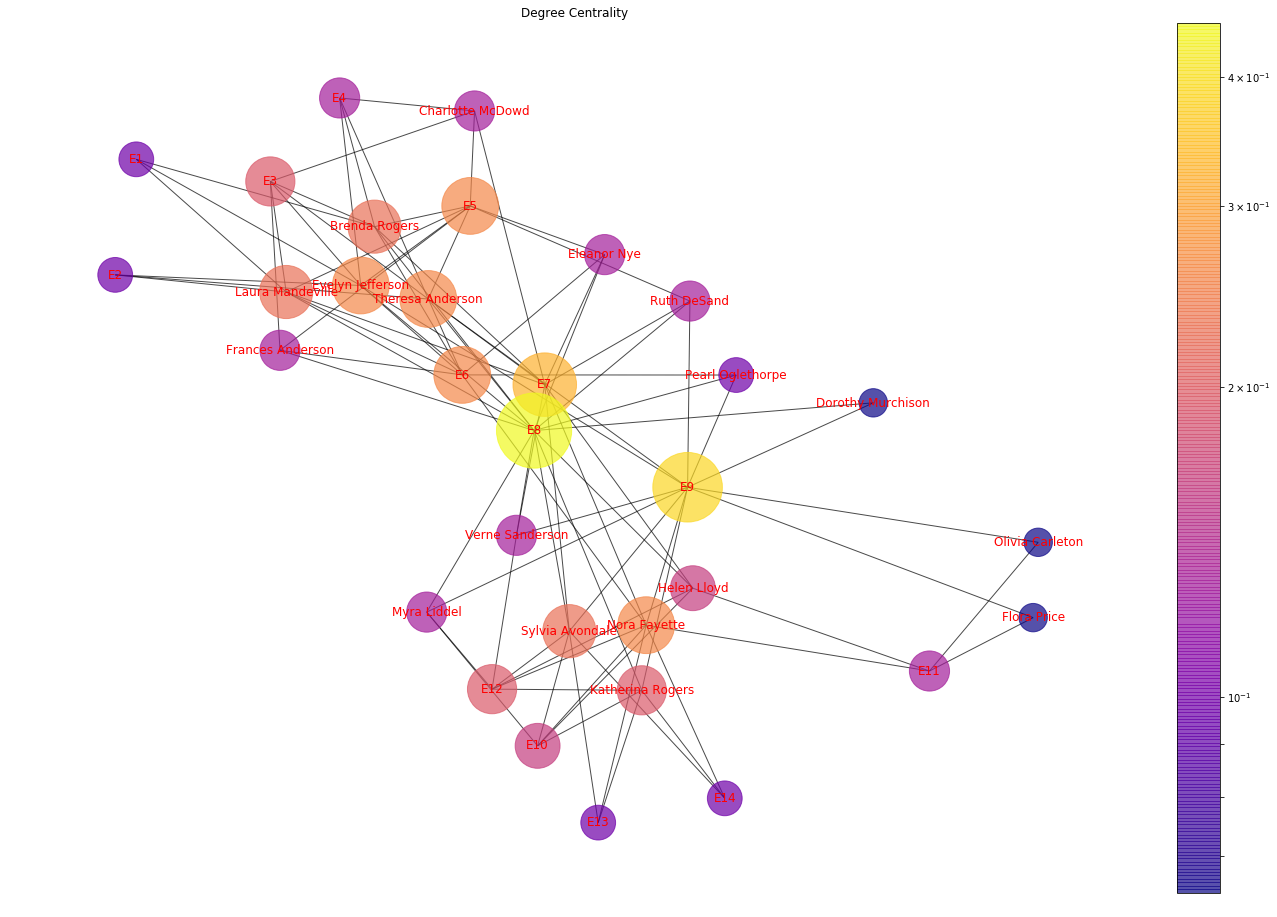

In [1114]:
pos= nx.spring_layout(G)
drawGraphColorBar(G, pos,nx.degree_centrality(G), 'Degree Centrality',4,5)

The degree centrality reveals some events and women nodes with high degree of centrality. Events 5,6,7,8, and 9 seems to play a curial rule in connecting women and Rogers, Anderson, Jefferson, Mandeville, Fayette, and Avondale are seems to be active in the community.

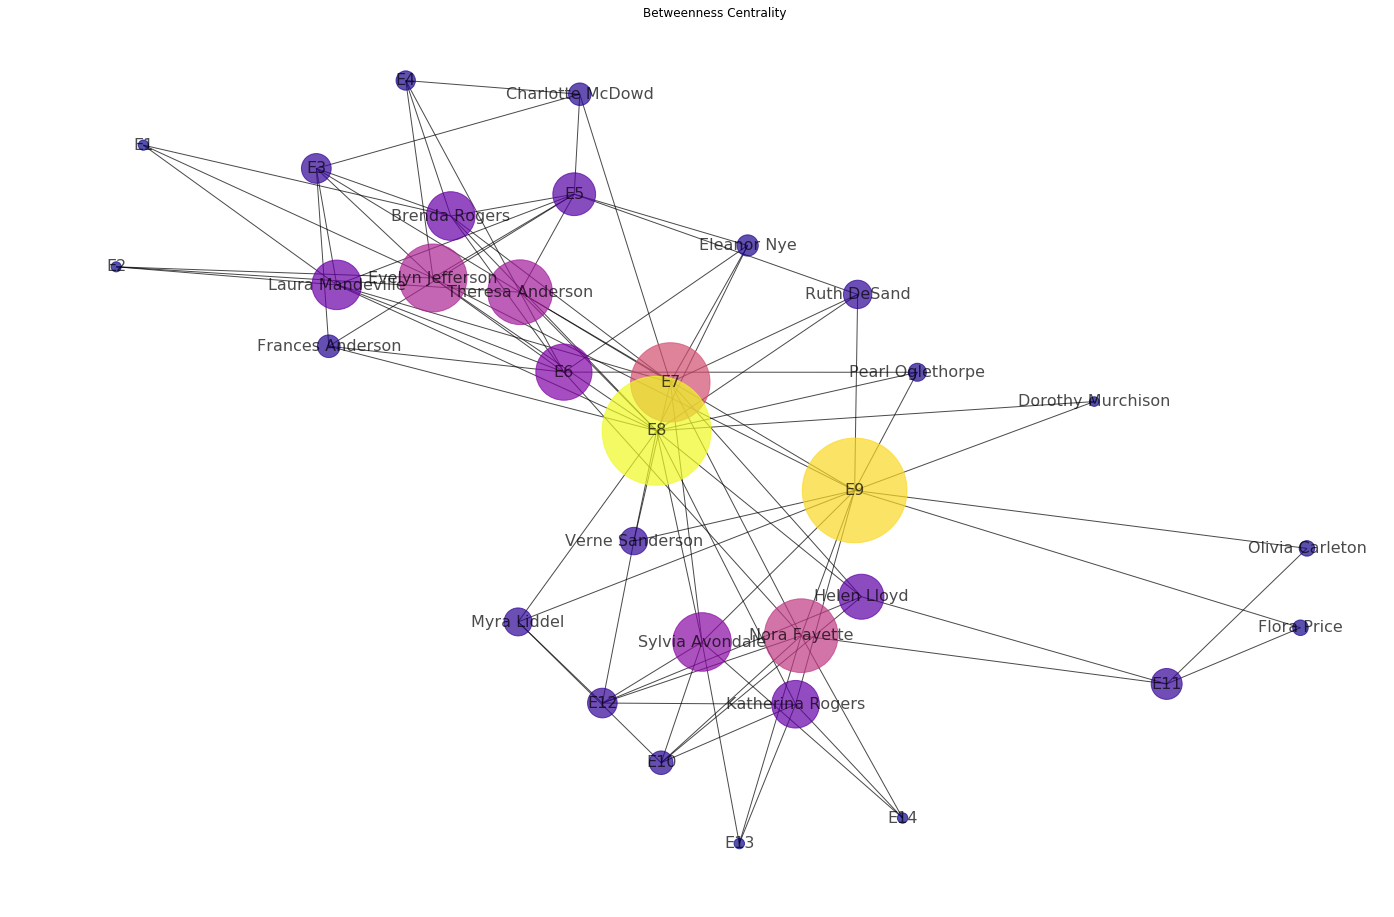

In [1115]:
drawGraph(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality',8,5)

The betweeness centrality clearly shows that Events 8 and 9 are major events that linked women and bridged the whole network. It also highlights Nora Fayette as an important figure in bridging and connecting communities.  

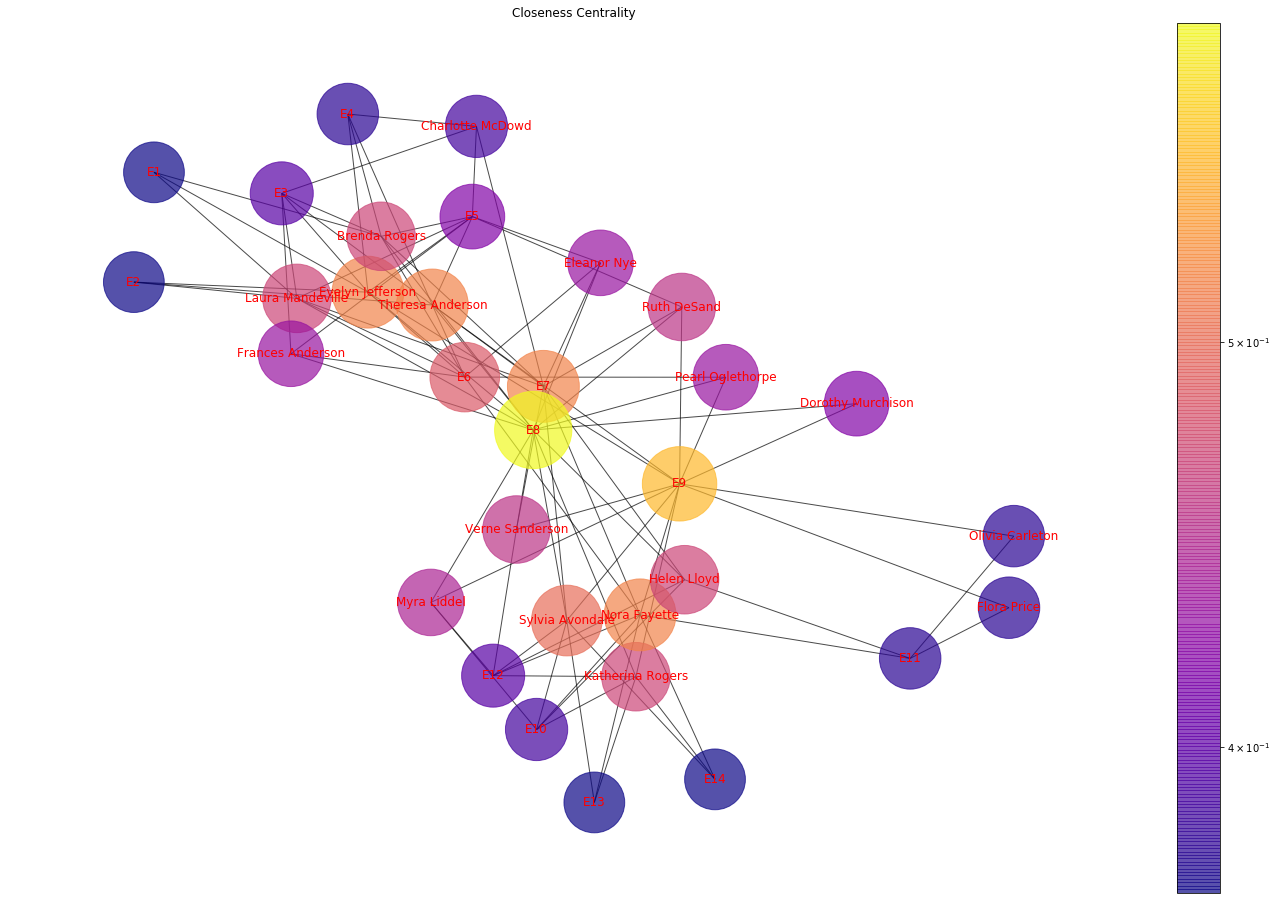

In [1116]:
drawGraphColorBar(G, pos, nx.closeness_centrality(G), 'Closeness Centrality',4,4)

The closeness measure between nodes seems to have close distance between connections. The closeness measures show that the bridge nodes are very connected to their surrounded nodes in their community.

Did women who attend more events have made more friends? Did events allowed women to have more Interaction and sufficient to have more friends? To answer these questions, we need to have a deep study to find the strength of the relationship and dominant variable of the network between women and events despite the results of the previous graphs that shows some important figures and events. Thus, it required individual analysis the tackles in each variable node separately.

## Women VS Women Analysis 

Finding how many new friends every woman has made and compare it with the number of attended events will provide some answer to the above question. By applying the projection bipartite onto women nodes, the number of friends every woman has made will be determined.

The following table shows the womens record of events participation.

In [1117]:
names = list(womenDeg.keys())
nEvents = list(womenDeg.values())

t1 = PrettyTable(['Woman','nEvents'])

for i in range(len(names)):
    v=names[i],nEvents[i]
    t1.add_row(v)
    
t1.sortby = "nEvents"
t1.reversesort = True 

print(t1)

+-------------------+---------+
|       Woman       | nEvents |
+-------------------+---------+
|  Theresa Anderson |    8    |
|    Nora Fayette   |    8    |
|  Evelyn Jefferson |    8    |
|  Sylvia Avondale  |    7    |
|  Laura Mandeville |    7    |
|   Brenda Rogers   |    7    |
|  Katherina Rogers |    6    |
|    Helen Lloyd    |    5    |
|  Verne Sanderson  |    4    |
|    Ruth DeSand    |    4    |
|    Myra Liddel    |    4    |
|  Frances Anderson |    4    |
|    Eleanor Nye    |    4    |
|  Charlotte McDowd |    4    |
|  Pearl Oglethorpe |    3    |
|  Olivia Carleton  |    2    |
|    Flora Price    |    2    |
| Dorothy Murchison |    2    |
+-------------------+---------+


Did the women who participated in more events gain more friends?
To answer this question we need to find the number of women everyone met during their events participation. 

In [1118]:
W = bipartite.weighted_projected_graph(G, womenNodes, ratio=False)

In [1119]:
lb={}
for w in womenNodes:
    lb[w]=  w + ":"+ str(W.degree(w))

nFreinds={}
for w in womenNodes:
    nFreinds[w]= W.degree(w)

nfriends=list(nFreinds.values())
names=list(nFreinds.keys())

df = pd.DataFrame({'Events':nEvents,'Friends':nfriends,'Names':names})
df = df.reindex(['Names','Friends','Events'], axis=1)
df = df.sort_values(by='Events',ascending=False)
df.reset_index(inplace=True,drop=True)
df = df.set_index("Names", drop = False)

t2 = PrettyTable(['Woman','nFreinds','nEvents'])

for i in range(len(names)):
    v=names[i],nfriends[i],nEvents[i]
    t2.add_row(v)
    
t2.sortby = "nEvents"
t2.reversesort = True 

print(t2)

+-------------------+----------+---------+
|       Woman       | nFreinds | nEvents |
+-------------------+----------+---------+
|  Theresa Anderson |    17    |    8    |
|    Nora Fayette   |    17    |    8    |
|  Evelyn Jefferson |    17    |    8    |
|  Sylvia Avondale  |    17    |    7    |
|  Laura Mandeville |    15    |    7    |
|   Brenda Rogers   |    15    |    7    |
|  Katherina Rogers |    16    |    6    |
|    Helen Lloyd    |    17    |    5    |
|  Verne Sanderson  |    17    |    4    |
|    Ruth DeSand    |    17    |    4    |
|    Myra Liddel    |    16    |    4    |
|  Frances Anderson |    15    |    4    |
|    Eleanor Nye    |    15    |    4    |
|  Charlotte McDowd |    11    |    4    |
|  Pearl Oglethorpe |    16    |    3    |
|  Olivia Carleton  |    12    |    2    |
|    Flora Price    |    12    |    2    |
| Dorothy Murchison |    16    |    2    |
+-------------------+----------+---------+


 #### Projection Graph

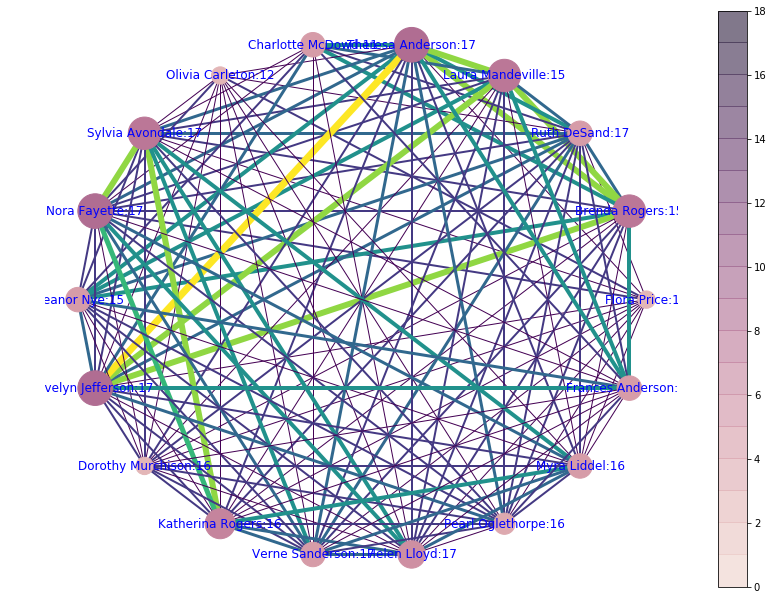

In [1120]:
valf=[v * 150 for v in nEvents]

weights = [edata['weight'] for f,t,edata in W.edges(data=True)]

color_palette = sns.cubehelix_palette(18)
sm = plot.cm.ScalarMappable(cmap=ListedColormap(color_palette),
                           norm=plot.Normalize(vmin=0, vmax=18))
nodeColor=[]
for i in range(len(nEvents)):
    nodeColor.append(color_palette[nEvents[i]])


plot.figure(figsize = (11,8))
nx.draw_shell(W, width=weights, labels=lb, 
              edge_color=weights,
              node_size=valf,
              alpha_nodes=0.6,
              font_size=12,
              font_color='b',
              node_color=nodeColor,
              nodelist=womenDeg.keys())

sm._A = []
plot.colorbar(sm,alpha=0.6)
plot.axis('off')
plot.show()

As shown in the table above and the projection graph, attending more events doesn't really mean that you are making more friends. For example both Dorothy Murchison and Theresa Anderson have made 17 friends but Theresa Anderson has attended 8 events (shwon by the weighted edges) while Dorothy Murchison attended only 2 events. Indeed, Charlotte McDowd have attended 4 events and only met 11 different friends, which is 3 friends less than Dorothy Murchison.

The Weighted edges shows some strong connection links between large number of the women. Jefferson and Anderson, Avondale and Fayette, Desand and Mandeville and many others. 

The results indicate that the number of attended events would not be sufficient to determine the number of friends and the weighed edges shows some strong connections between a number of women. 

Let's investigate the number of co-occurrence between women’s. If they really are getting to be friends, they must have more interaction and meet more often. 

In [1121]:
W = bipartite.weighted_projected_graph(G, womenNodes)
df = df.set_index("Names", drop = True)
df['Co_Occurence']=" "

In [1122]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
Occurrence={}
for w in womenNodes:
    Occurrence[w]=W.degree(w, weight='weight')
    df.loc[w,'Co_Occurence']=W.degree(w, weight='weight')

nOccurrence=list(Occurrence.values())
t3 = PrettyTable(['Woman','nFreinds','nEvents','Co_Occurrence'])

for i in range(len(names)):
    v=names[i],nfriends[i],nEvents[i],nOccurrence[i]
    t3.add_row(v)
t3.sortby = "nEvents"
print(t3)

+-------------------+----------+---------+---------------+
|       Woman       | nFreinds | nEvents | Co_Occurrence |
+-------------------+----------+---------+---------------+
| Dorothy Murchison |    16    |    2    |       24      |
|    Flora Price    |    12    |    2    |       14      |
|  Olivia Carleton  |    12    |    2    |       14      |
|  Pearl Oglethorpe |    16    |    3    |       31      |
|  Charlotte McDowd |    11    |    4    |       24      |
|    Eleanor Nye    |    15    |    4    |       36      |
|  Frances Anderson |    15    |    4    |       32      |
|    Myra Liddel    |    16    |    4    |       33      |
|    Ruth DeSand    |    17    |    4    |       40      |
|  Verne Sanderson  |    17    |    4    |       38      |
|    Helen Lloyd    |    17    |    5    |       34      |
|  Katherina Rogers |    16    |    6    |       37      |
|   Brenda Rogers   |    15    |    7    |       46      |
|  Laura Mandeville |    15    |    7    |       45     

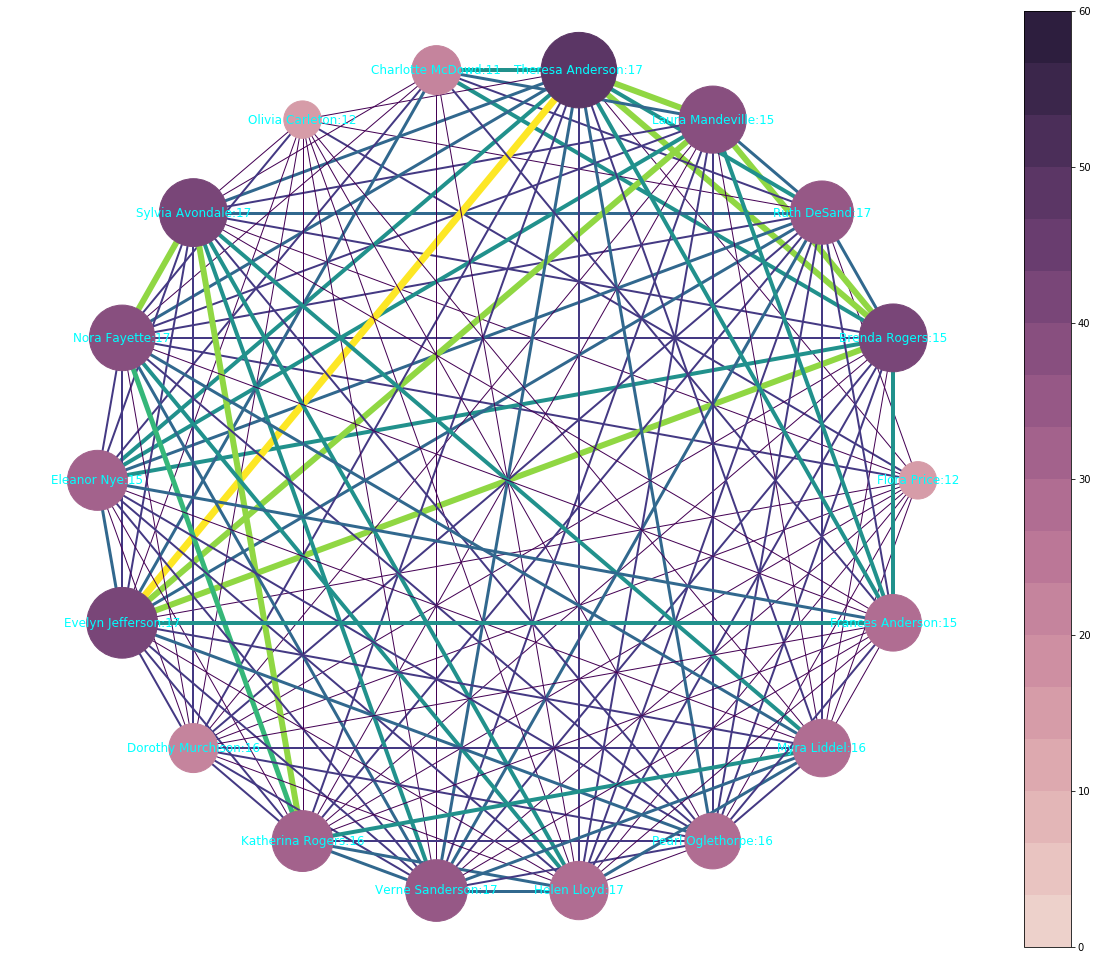

In [1123]:
valf=[v * 100 for v in nOccurrence]
colValue=[round(v / 4) for v in nOccurrence]

color_palette = sns.cubehelix_palette(18)
sm = plot.cm.ScalarMappable(cmap=ListedColormap(color_palette),
                           norm=plot.Normalize(vmin=0, vmax=60))

nodeColor=[]
for i in range(len(nEvents)):
    nodeColor.append(color_palette[colValue[i]])


plot.figure(figsize = (16,13))
nx.draw_shell(W, width=weights, labels=lb, 
              edge_color=weights,
              node_size=valf,
              font_size=12,
              font_color='aqua',
              node_color=nodeColor,
              alpha_nodes=.5,
              nodelist=womenDeg.keys())

sm._A = []
plot.colorbar(sm,alpha=1)
plot.axis('off')
plot.show()

The number of interaction between induvial reveals that most women who attended more events have high co-occurrences and thus have made an active friendship. For example, Theresa Anderson had attended 8 events and made 17 friends with 57 co-occurrences. 

Even though the majority of women who attended more events had high co-occurrences, few women attended few events and have higher co-occurrences then others who attended more events. For example, Charlotte McDowd made 11 friend attending 4 events and have 24 co-occurrences while Dorothy Murchison made 16 friends attending 2 events and have 24 co-occurrences. Other discrepancy are women who have the same number of friends and attended the same number of events had different number of co-occurrences such as Theresa Anderson, Nora Fayette, and Evelyn Jefferson with co-concurrences of 57,43, and 50 respectively.

Let’s investigate the centrality of women to find the active women in the community and keys connection between small groups.

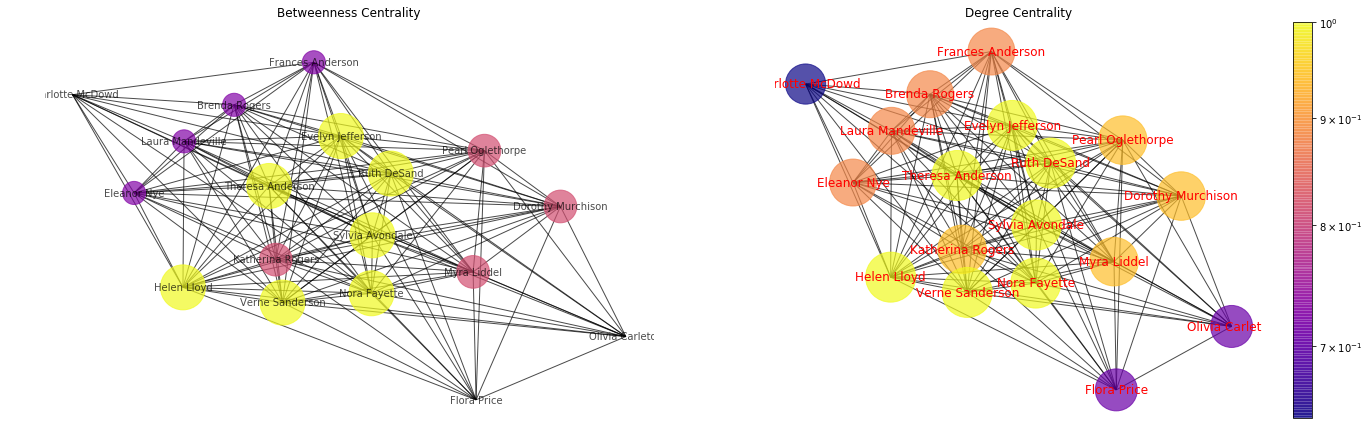

In [1124]:
pos1 = nx.spring_layout(W)

plot.subplot(221)
drawGraph(W, pos1,  nx.betweenness_centrality(W), 'Betweenness Centrality',5,20)
plot.subplot(222)
drawGraphColorBar(W, pos1,nx.degree_centrality(W), 'Degree Centrality',1,1)

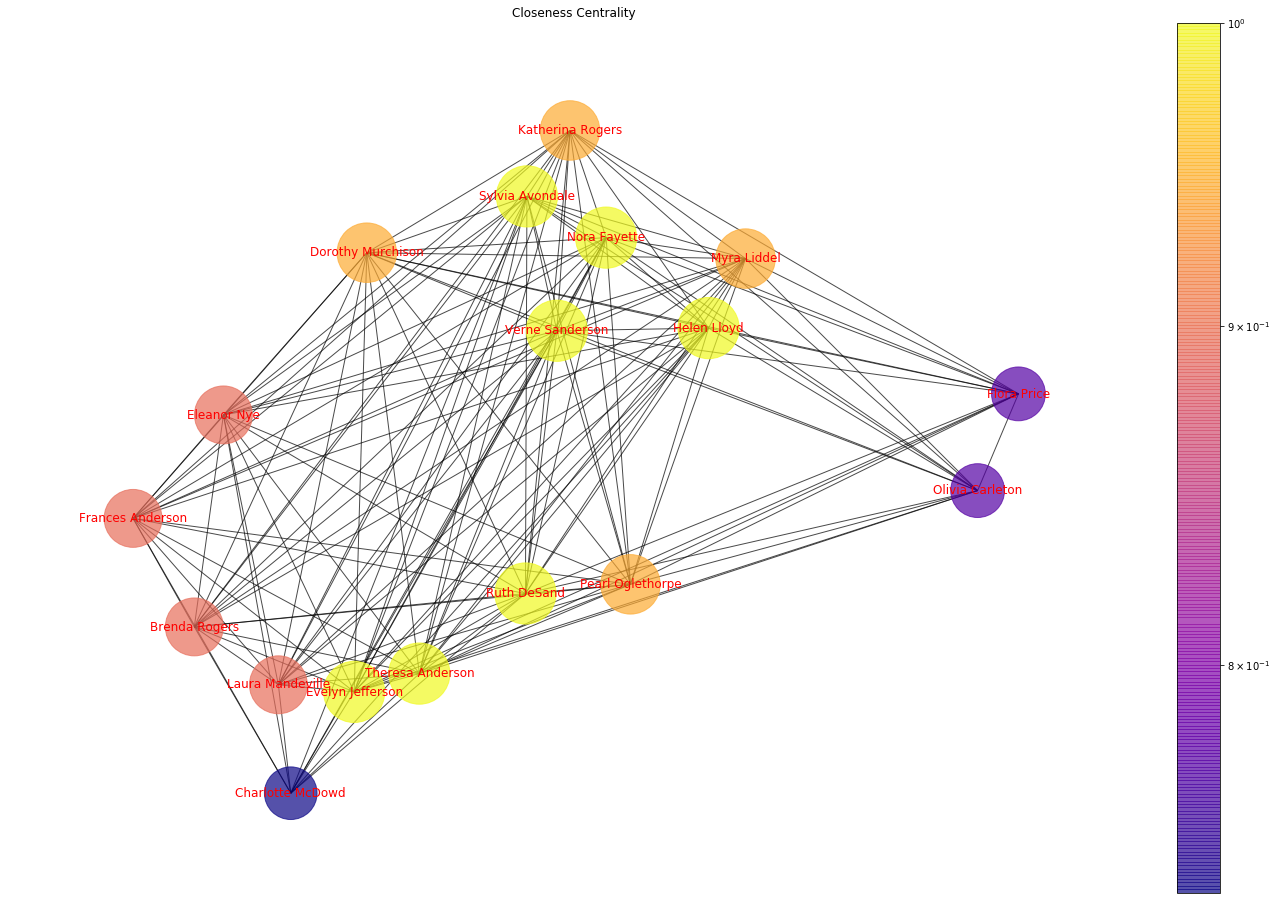

In [1125]:
drawGraphColorBar(W, pos2, nx.closeness_centrality(W), 'Closeness Centrality',1,1.5)

The degree of centrality between women varies from 64% to 100 % illustrated by the colorbar.  The result shows a good degree of centrality between women and highlights the 6 most active women in the network that are colored in yellow Lioyd, Sanderson, Anderson, Fayette, Avondale, and DeSand.

The betweenness centrality shows three different levels. The yellow group, consist of 7 women which have the highest level of betweenness, followed by the orange group with 4 women and the purple group with the lowest level consists of 4 women too.  

The betweenness centrality illustrates that network is very strong connected network that doesn’t have a node singularity that could play a crucial rules of splitting the network. Nodes are composed of different level with multiple nodes at each level.

The result of the centrality didn’t reveal any clue that could explain the inconsistent results regarding the relationship between friends and the number of events.

Let's analyze the events effect on social friendship between women in the network we might get answers for our questions.

## Events Vs Events Analysis

Let's see the distribution of women per events.

In [1126]:
names=list(eventsDeg.keys())
nWoman=list(eventsDeg.values())

t4 = PrettyTable(['Events', 'nWoman'])

for i in range(len(names)):
    v=names[i],nWoman[i]
    t4.add_row(v)
    
t4.sortby = "nWoman"
t4.reversesort = True
print("The number attended women per events")
print(t4)

The number attended women per events
+--------+--------+
| Events | nWoman |
+--------+--------+
|   E8   |   14   |
|   E9   |   12   |
|   E7   |   10   |
|   E6   |   8    |
|   E5   |   8    |
|   E3   |   6    |
|  E12   |   6    |
|  E10   |   5    |
|   E4   |   4    |
|  E11   |   4    |
|   E2   |   3    |
|  E14   |   3    |
|  E13   |   3    |
|   E1   |   3    |
+--------+--------+


The above table shows very few events with high participation (10 to 14 women) and few events that have very low participation (3 -5 women)

In [1127]:
W = bipartite.weighted_projected_graph(G, eventsNodes)

In [1128]:
lb={}
for w in eventsNodes:
    lb[w]=  w + ":"+ str(W.degree(w))

eventSpan={}
for w in eventsNodes:
    eventSpan[w]= W.degree(w)
vala = [v * 300 for v in eventSpan.values()]

eventSpan=list(eventSpan.values())
t5=PrettyTable(['Events','nWoman','eventSpan'])

for i in range(len(names)):
    v=names[i],nWoman[i],eventSpan[i]
    t5.add_row(v)
    
t5.sortby = "nWoman"
t5.reversesort = True 

print(t5)

+--------+--------+-----------+
| Events | nWoman | eventSpan |
+--------+--------+-----------+
|   E8   |   14   |     13    |
|   E9   |   12   |     13    |
|   E7   |   10   |     13    |
|   E6   |   8    |     13    |
|   E5   |   8    |     8     |
|   E3   |   6    |     8     |
|  E12   |   6    |     8     |
|  E10   |   5    |     8     |
|   E4   |   4    |     8     |
|  E11   |   4    |     8     |
|   E2   |   3    |     8     |
|  E14   |   3    |     8     |
|  E13   |   3    |     8     |
|   E1   |   3    |     8     |
+--------+--------+-----------+


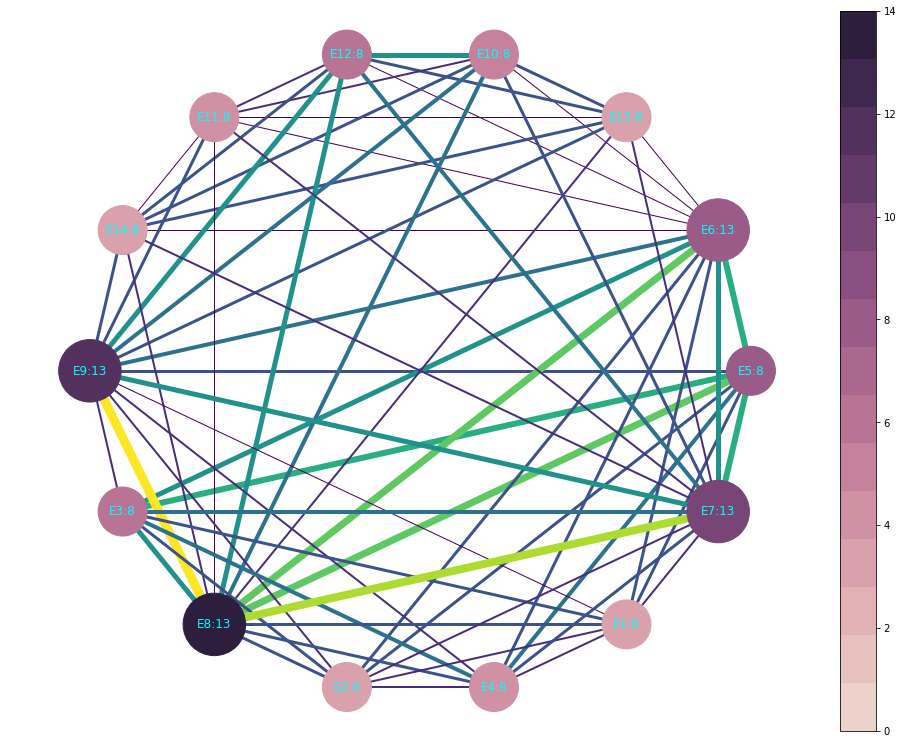

In [1129]:
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]

color_palette = sns.cubehelix_palette(15)
sm = plot.cm.ScalarMappable(cmap=ListedColormap(color_palette),
                           norm=plot.Normalize(vmin=0, vmax=14))
nodeColor=[]
for i in range(len(nWoman)):
    nodeColor.append(color_palette[nWoman[i]])

plot.figure(figsize = (13,10))
nx.draw_shell(W, width=weights, labels=lb, 
              edge_color=weights,
              node_size=vala,
              font_size=12,
              font_color='aqua',
              node_color=nodeColor,
              nodelist=eventsDeg.keys())

#fig.set_size_inches(12,12)
sm._A = []
plot.colorbar(sm,alpha=1)
plot.axis('off')
plot.show()

The above chart and table shows some strong events nodes that have very high degree of connectivity. The weighted edges show a strong links between E8 and 4 other nodes E9, E7, E6 and E5.

In [1130]:
lb={}
for w in eventsNodes:
    lb[w]=  w + ":"+ str(W.degree(w, weight='weight'))

Co_Occurrence={}
for w in eventsNodes:
    Co_Occurrence[w]= W.degree(w, weight='weight')
vala = [v * 200 for v in Co_Occurrence.values()]

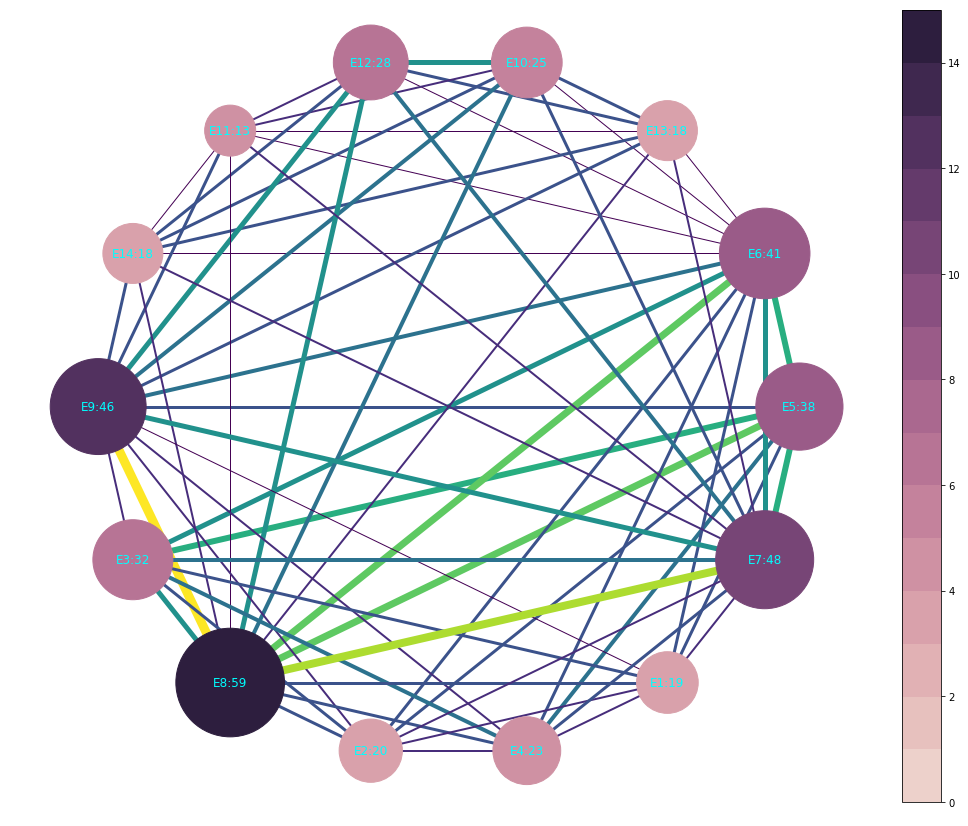

In [1131]:
color_palette = sns.cubehelix_palette(15)
sm = plot.cm.ScalarMappable(cmap=ListedColormap(color_palette),
                           norm=plot.Normalize(vmin=0, vmax=15))
nodeColor=[]
for i in range(len(nWoman)):
    nodeColor.append(color_palette[nWoman[i]])

plot.figure(figsize = (14,11))
nx.draw_shell(W, width=weights, labels=lb, 
              edge_color=weights,
              node_size=vala,
              font_size=12,
              font_color='aqua',
              node_color=nodeColor,
              nodelist=eventsDeg.keys())

sm._A = []
plot.colorbar(sm,alpha=1)
plot.axis('off')
plot.show()

It seems lie events with high participation had high co-occurrences. Event 8 and 9,7,6,5 seems to hold the large amount of women. The graph also show event 8 have the highest co-occurrences of all events  and have the highest weighted links connected to 4 other events node with high co-occurrences values.  

Let’s investigate the centrality of women see if it can reveal some network secrets and answer our questions.

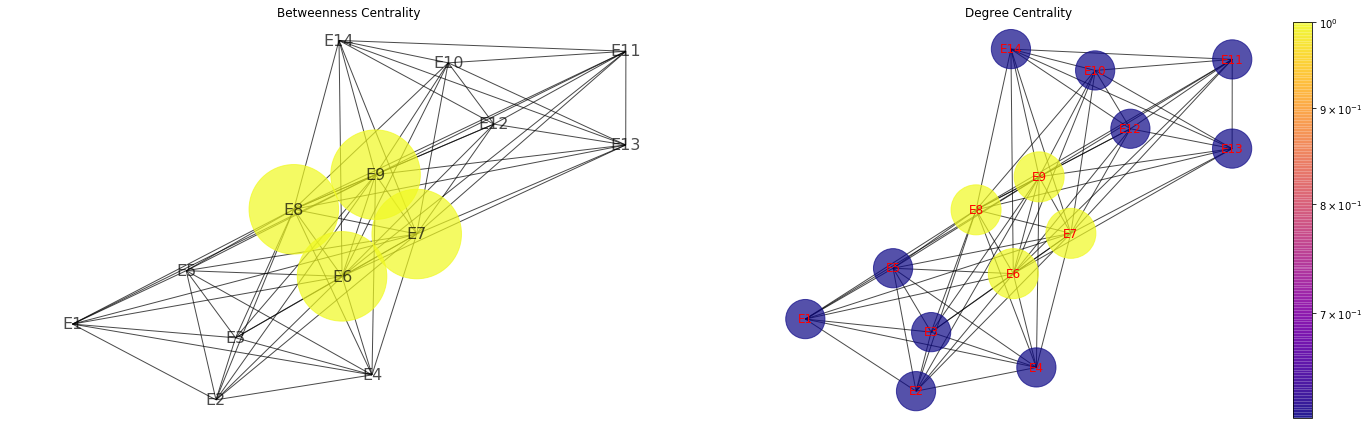

In [1132]:
pos1 = nx.spring_layout(W)

plot.subplot(221)
drawGraph(W, pos1,  nx.betweenness_centrality(W), 'Betweenness Centrality',8,10)
plot.subplot(222)
drawGraphColorBar(W, pos1,nx.degree_centrality(W), 'Degree Centrality',4,1)

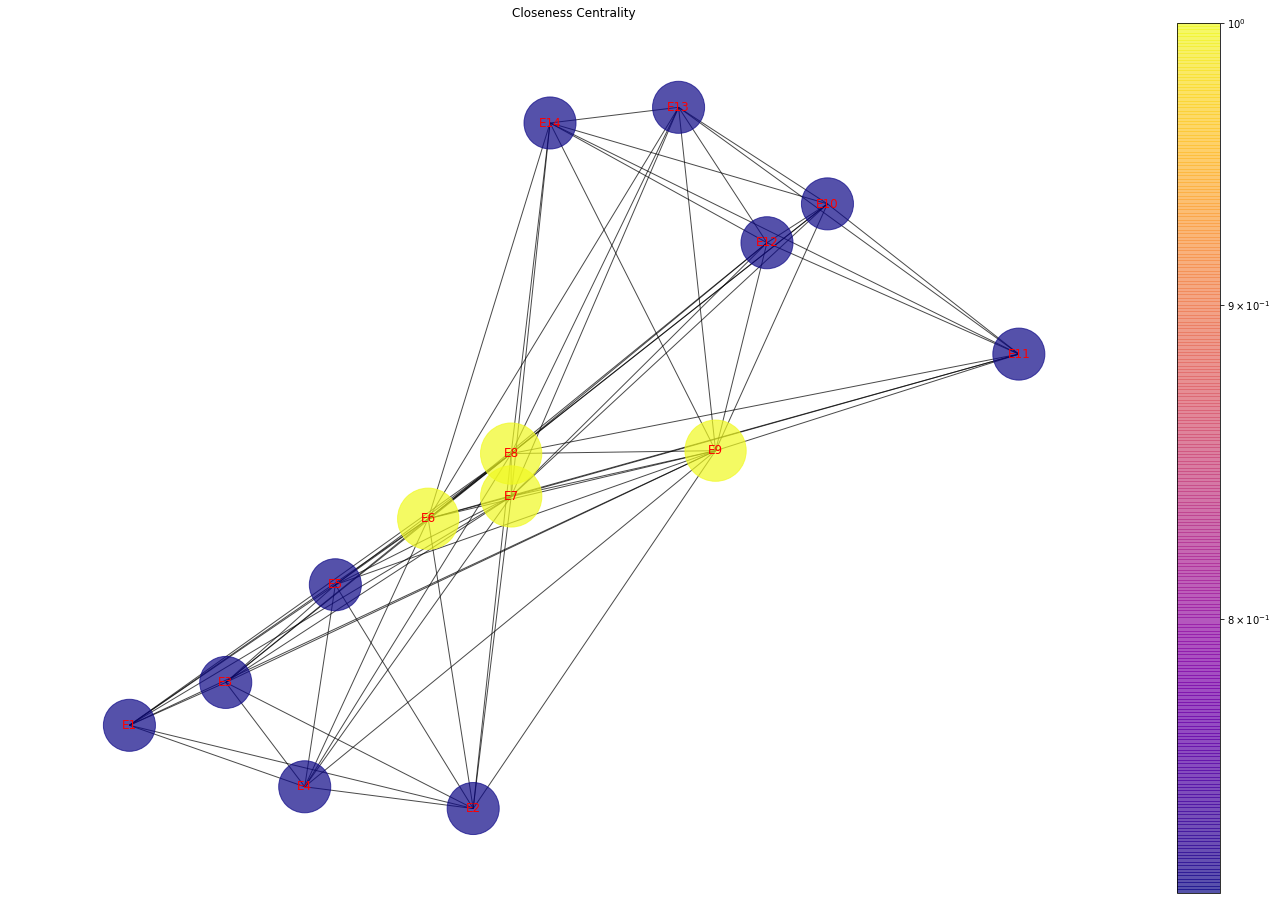

In [1133]:
drawGraphColorBar(W, pos2, nx.closeness_centrality(W), 'Closeness Centrality',16,1.5)

The above graphs of the betweenness and closeness shows that there are four of the events, 8, 9, 7, and 6, play a crucial rule and have major weight in connecting the network. In addition, these events have the most women participation of all events. Could women who participate in these events have high co-occurrence and made more friends in few events participation?

In [1134]:
def GetEgoNode(Node):
    E = nx.Graph(nx.ego_graph(G,Node))
    #E8 = nx.Graph(nx.ego_graph(G, 'E8', radius = 2))
    pos = nx.circular_layout(E)

    Enodes=E.nodes()
    EtempNodes=list(Enodes)
    EtempNodes.remove(Node)

    EcO_Occurence={}
    for w in EtempNodes:
        EcO_Occurence[w]=df.loc[w,'Co_Occurence'] 

    
    #EcO_Occurence[Node]= nAttended[Node]
    v1,v2=splitDict(EcO_Occurence,list(Enodes).index(Node))
    v1[Node]= nAttended[Node]
    NodesSize = {**v1,**v2}
    
    #display=pd.DataFrame({'Co_Occurence':list(NodesSize.values()),'Names':list(NodesSize.keys())})
    
    lb={}
    for w in Enodes:
        lb[w]=  w + ":"+ str(NodesSize[w])

    valn = [v * 50 for v in NodesSize.values()]

    #M=nx.blockmodel(G,E8,multigraph=True)
    fig = plot.gcf()
    fig.set_size_inches(18,13)
    nx.draw(E,pos,labels=lb,
                  cmap=plot.cm.plasma,
                  node_size=valn,
                  font_size=8,
                  alpha=.7,
                  font_color='black',
                  node_color='r',
                  edge_color='g',
    )
    
    return E.nodes()

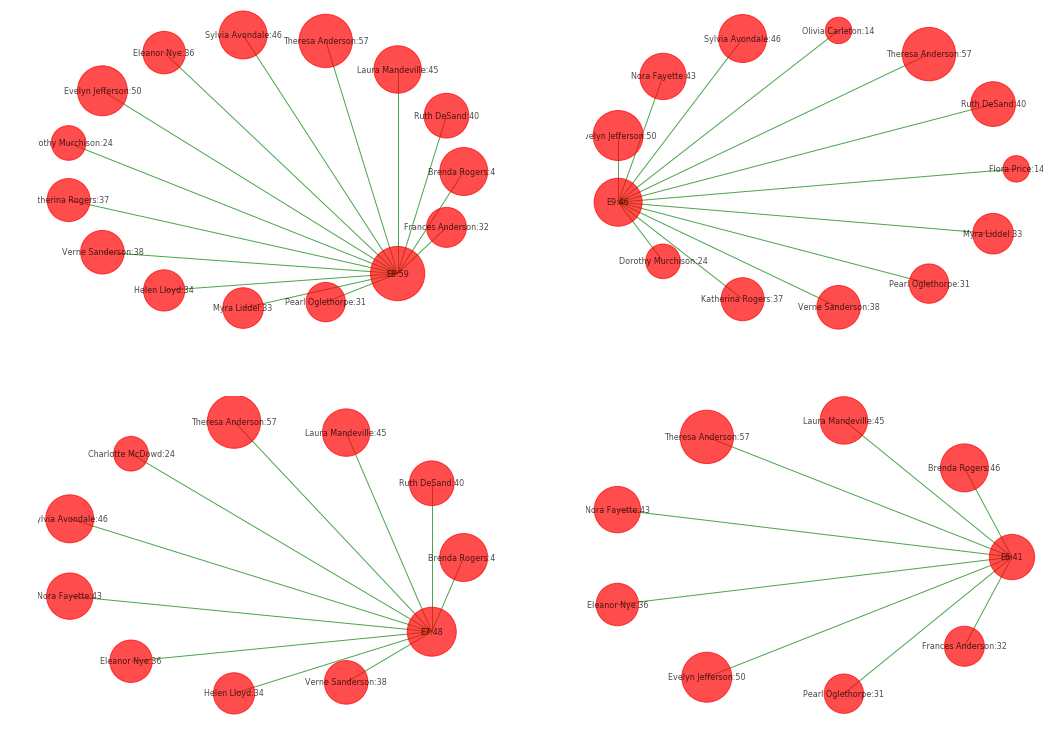

In [1135]:
plot.subplot(221)
disp1=GetEgoNode('E8')
plot.subplot(222)
disp2=GetEgoNode('E9')
plot.subplot(223)
disp3=GetEgoNode('E7')
plot.subplot(224)
disp4=GetEgoNode('E6')
plot.axis('off')
plot.show()

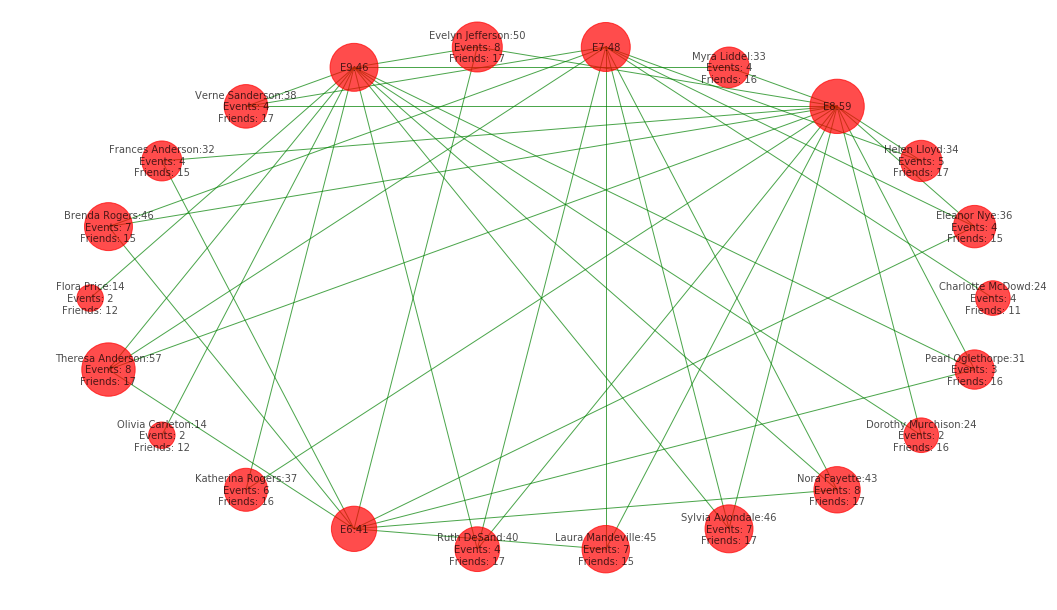

In [1136]:
Nodes=list(disp1)+list(disp2)+list(disp3)+list(disp4)
E = G.subgraph(Nodes)
E.edges()
pos = nx.circular_layout(E)

Enodes=E.nodes()
EtempNodes=list(Enodes)
EtempNodes.remove("E8")
EtempNodes.remove("E9")
EtempNodes.remove("E7")
EtempNodes.remove("E6")

EcO_Occurence={}
nFriends={}
nEvents={}
EventOccurences={}
for w in Enodes:
    if w in EtempNodes:
        EcO_Occurence[w]=df.loc[w,'Co_Occurence']
        nEvents[w]=df.loc[w,'Events']
        nFriends[w]=df.loc[w,'Friends']
    if w in Co_Occurrence:
        EventOccurences[w]=Co_Occurrence[w]

eventNodes=["E8","E7","E9","E6"]
for node in eventNodes:
    v1,v2=splitDict(EcO_Occurence,list(Enodes).index(node))
    v1[node]= EventOccurences[node]
    NodesSize = {**v1,**v2}
    EcO_Occurence=NodesSize
    
lb={}
for w in Enodes:
    if w in EtempNodes:
        lb[w]=  w + ":"+ str(EcO_Occurence[w])+"\n"+ "Events: "+str(nEvents[w])+"\n"+"Friends: "+str(nFriends[w])
    if w in Co_Occurrence:
        lb[w]= w + ":"+str(EventOccurences[w])

valn = [v * 50 for v in EcO_Occurence.values()]

plot.figure(figsize = (14,8))
nx.draw(E,pos,labels=lb,
              cmap=plot.cm.plasma,
              node_size=valn,
              font_size=10,
              alpha=0.7,
              font_color='black',
              node_color='r',
              edge_color='g',
)

plot.axis('off')
plot.show()


McDowd participated in 4 events, three small events and one large event, have 24 co-occurrence and 11 friend while Murchison attended 2 large events and have the same co-occurrences and made 16 friend, this indicates that discrepancy of the result is due to event density. Attending large events will results in making more friends and provide more interaction between participants; while, having attended most of the small and big events will result in better co-occurrences such as Theresa Anderson that have attended 8 events and made 17 friends and had the highest co-occurrences.

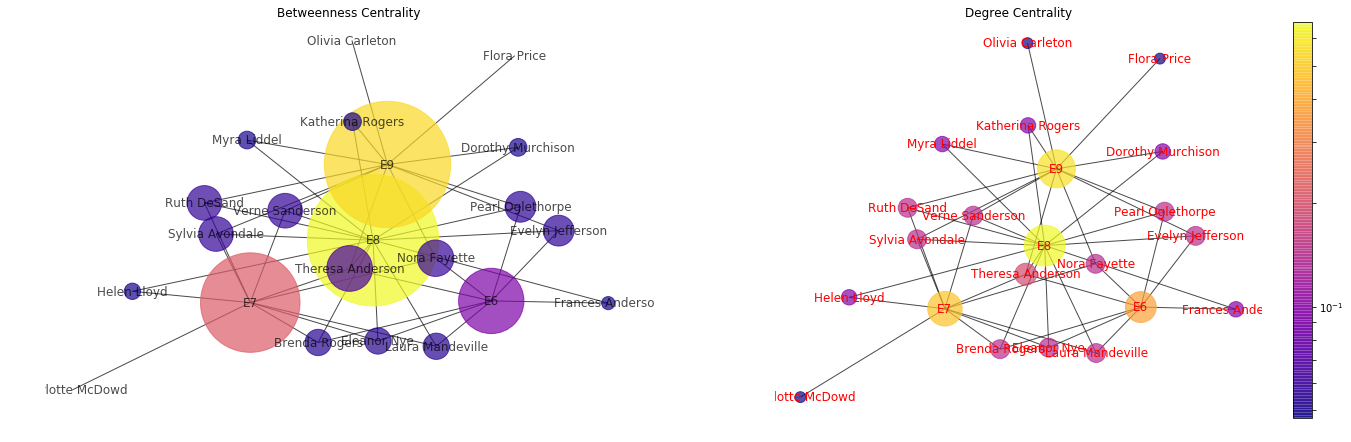

In [1137]:
pos1 = nx.spring_layout(H)
plot.subplot(221)
drawGraph(H, pos1,  nx.betweenness_centrality(H), 'Betweenness Centrality',6,5)
plot.subplot(222)
drawGraphColorBar(H, pos1,nx.degree_centrality(H), 'Degree Centrality',2,1)

The betweeness and degree of centrality of the subgraph of the four events shows that events has a higher degree of centrality and betweenness than women.

Conclusion:
- Women who attended large events had mode a lot of friends and decent relationship with few events. Ms. Murchison made 16 friends with two events verses Ms. Anderson who made 17 friends with 8 events including large events.
- Women who attended lot of events including large events had made more social interaction and was more active in the communities and participated in many of sequential small events that leads or tails the big events that keeps events rolling. 
- Based on the interaction there was at least three interconnected communities within the network
- Events 8, 9, 7, and 6 where the key factor in connecting and bridging the women network and increase the number of friendship
- Overall, events with more participant where more effective in term of friendship while attending more events improves social relationship between friends.


    